In [1297]:
import PyDSTool as dst
import matplotlib.pyplot as plt
from PyDSTool.Toolbox import phaseplane as pp
import numpy as np

In [1298]:
"""k_on1 = 1e5
A_01 = 1e-8
#k_on = k_on1*A_01
rho_T1 = 1e5
alpha = 3
k_off = 1e-4
q_on1 = 6.5e3
#q_on = q_on1*A_01
q_off = 4.7e-3
rho_N1 = 2.2e5
beta = 5 

A_0 = (172635*A_01*1.85e-18)/1.66e-24
rho_T = rho_T1/beta
rho_N = rho_N1/alpha
n_1 = k_on1*rho_T*(1/q_off)
n_2 = k_off/q_off
v = q_on1*(1/q_off)*rho_T
delta = rho_T/rho_N
Nr0 = ((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1)
Tr0 = ((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1)
C = (172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T)
mu_T = C/rho_T"""

'k_on1 = 1e5\nA_01 = 1e-8\n#k_on = k_on1*A_01\nrho_T1 = 1e5\nalpha = 3\nk_off = 1e-4\nq_on1 = 6.5e3\n#q_on = q_on1*A_01\nq_off = 4.7e-3\nrho_N1 = 2.2e5\nbeta = 5 \n\nA_0 = (172635*A_01*1.85e-18)/1.66e-24\nrho_T = rho_T1/beta\nrho_N = rho_N1/alpha\nn_1 = k_on1*rho_T*(1/q_off)\nn_2 = k_off/q_off\nv = q_on1*(1/q_off)*rho_T\ndelta = rho_T/rho_N\nNr0 = ((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1)\nTr0 = ((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1)\nC = (172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T)\nmu_T = C/rho_T'

In [1299]:
n_1 = dst.Par(425531914893.617, 'n_1')
n_2 = dst.Par(0.021276595744680685, 'n_2')
v = dst.Par(27659574468.085106, 'v')
delta = dst.Par(0.27272727272727276, 'delta')
A_01 = dst.Par(1e-7, 'A_01')
rho_T = dst.Par(100000, 'rho_T')
rho_N = dst.Par(7333.33333333, 'rho_N')

Nr0 = ((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1)
Tr0 = ((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1)

T = dst.Var('T')
N = dst.Var('N')
B = dst.Var('B')

T_rhs = (A_01*n_1*(1 - T - B)*((((172635*A_01*1.85e-18)/1.66e-24 + ((((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1))*rho_N) + ((((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1))*rho_T))/rho_T) - T - (N/delta) - B)) + B - (n_2*T) -(A_01*v*(1 - N - (delta*B))*T)
N_rhs = (A_01*v*(1 - N - (delta*B))*((((172635*A_01*1.85e-18)/1.66e-24 + ((((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1))*rho_N) + ((((A_01/5e-7)**1)/(0.01**1 + (A_01/5e-7)**1))*rho_T))/rho_T) - T - (N/delta) - B)) + (n_2*delta*B) - N -(A_01*n_1*(1 - T - B)*N)
B_rhs = ((A_01*n_1/delta)*(1 - T - B)*N) + (A_01*v*(1 - N - (delta*B))*T) - ((n_2 + 1)*B)

DSargs = dst.args(name='Single Complex Model')
DSargs.pars = [n_1, n_2, v, delta, A_01, rho_T, rho_N]
DSargs.varspecs = dst.args(T=T_rhs,
                           N=N_rhs,
                           B=B_rhs)
DSargs.ics = dst.args(T=Tr0.eval(), N=Nr0.eval(), B=0)
ode = dst.Generator.Vode_ODEsystem(DSargs)

In [1300]:
"""DSargs = dst.args(name='Single Complex Model')
DSargs.pars = {'n_1' : n_1,
               'n_2' : n_2,
               'v' : v,
               'delta' : delta,
               'mu_T' : mu_T,
               'A_01' : A_01,
               'rho_T': rho_T,
               'rho_N': rho_N,
               'Tr0': Tr0,  
               'Nr0': Nr0}

DSargs.varspecs = {'T': '(A_01*n_1*(1 - T - B)*((((172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T))/rho_T) - T - (N/delta) - B)) + B - (n_2*T) -(A_01*v*(1 - N - (delta*B))*T)',
                   'N': '(A_01*v*(1 - N - (delta*B))*((((172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T))/rho_T) - T - (N/delta) - B)) + (n_2*delta*B) - N -(A_01*n_1*(1 - T - B)*N)',
                   'B': '((A_01*n_1/delta)*(1 - T - B)*N) + (A_01*v*(1 - N - (delta*B))*T) - ((n_2 + 1)*B) '}

DSargs.ics = {'T': Tr0, 'N': Nr0, 'B': 0}
#DSargs.xdomain = {'T': [0, 1], 'N': [0, 1], 'B': [0, 1]}
#DSargs.fnspecs = {'Jacobian': (['t','T','N','B'],
 #                               [[n_1*((-mu_T) + 4*T + (N/delta) + 2*B - 1) - n_2 - v*(1 - N - delta*B), (n_1/delta)*(-1 + T + B) + v*T, n_1*(-mu_T + T + (N/delta) +4*B -1 +T) +1 +delta*T],
  #                                  [v*((-1/delta) + (4*N/delta) - mu_T + T + 2*B) - 1 - n_1*(1 - T - B), v*(-1 + N + delta*B) + n_1*N, v*(-delta*mu_T + delta*T - N + 2*B) + n_2*delta + n_1*N],
#                                 [(-n_1/delta)*N + v*(1 - N - delta*B), (n_1/delta)*(1 - T - B) - v*T, (-n_1/delta)*N - v*delta*T -]])} """

"DSargs = dst.args(name='Single Complex Model')\nDSargs.pars = {'n_1' : n_1,\n               'n_2' : n_2,\n               'v' : v,\n               'delta' : delta,\n               'mu_T' : mu_T,\n               'A_01' : A_01,\n               'rho_T': rho_T,\n               'rho_N': rho_N,\n               'Tr0': Tr0,  \n               'Nr0': Nr0}\n\nDSargs.varspecs = {'T': '(A_01*n_1*(1 - T - B)*((((172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T))/rho_T) - T - (N/delta) - B)) + B - (n_2*T) -(A_01*v*(1 - N - (delta*B))*T)',\n                   'N': '(A_01*v*(1 - N - (delta*B))*((((172635*A_01*1.85e-18)/1.66e-24 + (Nr0*rho_N) + (Tr0*rho_T))/rho_T) - T - (N/delta) - B)) + (n_2*delta*B) - N -(A_01*n_1*(1 - T - B)*N)',\n                   'B': '((A_01*n_1/delta)*(1 - T - B)*N) + (A_01*v*(1 - N - (delta*B))*T) - ((n_2 + 1)*B) '}\n\nDSargs.ics = {'T': Tr0, 'N': Nr0, 'B': 0}\n#DSargs.xdomain = {'T': [0, 1], 'N': [0, 1], 'B': [0, 1]}\n#DSargs.fnspecs = {'Jacobian': (['t','T','N','B'],

In [1301]:
#DSargs.tdomain = [0.000001, 100]
#ode = dst.Generator.Vode_ODEsystem(DSargs)
#traj = ode.compute('polarization')
#pts = traj.sample()

#plt.plot(np.log(pts['t']), pts['B'])
#plt.show()

In [1302]:
"""plt.figure(2)
pp.plot_PP_vf(ode, 'T', 'N')#, scale_exp=-1)
fp_coord = pp.find_fixedpoints(ode, n=100, eps=1e-3)[0]
fp = pp.fixedpoint_2D(ode, dst.Point(fp_coord), eps=1e-3)
nulls_x, nulls_y = pp.find_nullclines(ode, 'T', 'N', n=3, eps=1e-8, max_step=0.1, fps=[0, 0, 0])
pp.plot_PP_fps(fp)
plt.plot(nulls_x[:,0], nulls_x[:,1], 'b')
plt.plot(nulls_y[:,0], nulls_y[:,1], 'g')"""

"plt.figure(2)\npp.plot_PP_vf(ode, 'T', 'N')#, scale_exp=-1)\nfp_coord = pp.find_fixedpoints(ode, n=100, eps=1e-3)[0]\nfp = pp.fixedpoint_2D(ode, dst.Point(fp_coord), eps=1e-3)\nnulls_x, nulls_y = pp.find_nullclines(ode, 'T', 'N', n=3, eps=1e-8, max_step=0.1, fps=[0, 0, 0])\npp.plot_PP_fps(fp)\nplt.plot(nulls_x[:,0], nulls_x[:,1], 'b')\nplt.plot(nulls_y[:,0], nulls_y[:,1], 'g')"

In [1303]:
ode.set(pars = {'A_01': 1e-7})
ode.set(ics = {'T': 0.57,
               'N': 0.88,
               'B': 0.42})

PC = dst.ContClass(ode)

PCargs = dst.args(name='EQ1', type='EP-C')
PCargs.freepars = ['A_01']
PCargs.MaxNumPoints = 500
PCargs.MaxStepSize = 1e-3
PCargs.MinStepSize = 1e-6
PCargs.StepSize = 1e-4
PCargs.LocBifPoints = 'LP'
PCargs.SaveEigen = True


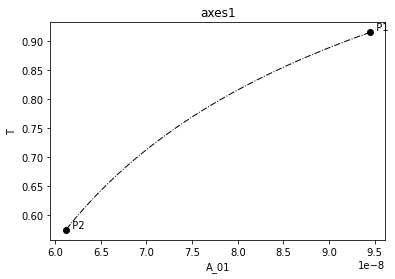

In [1304]:
PC.newCurve(PCargs)
PC['EQ1'].backward()
PC.display(['A_01', 'T'], stability=True, figure=3)

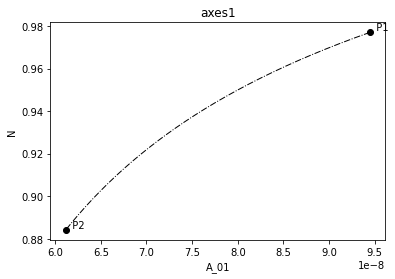

In [1305]:
PC.display(['A_01', 'N'], stability=True)#, figure=3)

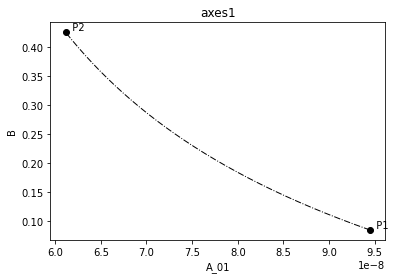

In [1306]:
PC.display(['A_01', 'B'], stability=True)#, figure=3)

In [1307]:
"""PCargs = dst.args(name='SN1', type='LP-C')
PCargs.initpoint    = 'EQ1:LP1'
PCargs.freepars     = ['A_01', 'delta']
PCargs.MaxStepSize  = 10
PCargs.LocBifPoints = ['CP']
PCargs.MaxNumPoints = 200
PC.newCurve(PCargs)
PC['SN1'].forward()
PC['SN1'].backward()
PC['SN1'].display(['A_01','B'], figure=4)"""

"PCargs = dst.args(name='SN1', type='LP-C')\nPCargs.initpoint    = 'EQ1:LP1'\nPCargs.freepars     = ['A_01', 'delta']\nPCargs.MaxStepSize  = 10\nPCargs.LocBifPoints = ['CP']\nPCargs.MaxNumPoints = 200\nPC.newCurve(PCargs)\nPC['SN1'].forward()\nPC['SN1'].backward()\nPC['SN1'].display(['A_01','B'], figure=4)"

In [1308]:
print(PC['EQ1'].getSpecialPoint('LP1'))

None


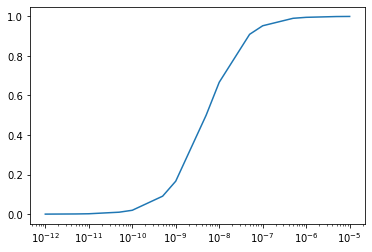

In [1309]:
def hill(x):
    x = x/5e-7
    return x**1/(0.01**1 + x**1)

A0_array = [1e-12, 5e-12, 1e-11, 5e-11, 1e-10, 5e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
list = []

for i in range(len(A0_array)):
    list.append(hill(A0_array[i]))

plt.semilogx(A0_array, list)
plt.show()